---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [20]:
'''
binomial(n, p, size=None)

Draw samples from a binomial distribution.

Samples are drawn from a binomial distribution with specified
parameters, n trials and p probability of success where
n an integer >= 0 and p is in the interval [0,1]. (n may be
input as a float, but it is truncated to an integer in use)
'''

np.random.binomial(1, 0.5) #lets say 0=head, 1=tai;

1

In [23]:
np.random.binomial(1000, 0.5)/1000 #pretty close to 0.5 half the times head and half the times tail

0.508

In [36]:
'''
Suppose we want to simulate the probability of flipping a fair coin 20 times, and getting a number greater than or equal to 15. 
Use np.random.binomial(n, p, size) to do 10000 simulations of flipping a fair coin 20 times, then see what proportion of the 
simulations are 15 or greater.
'''
x = np.random.binomial(20, 0.5, 10000)
print(x)
print((x>=15).mean())

[12 13 10 ..., 11 13  9]
0.0215


In [24]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

9

In [38]:
#we have to count the no. of tornados back to back for 2 days over last 2739 years
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000) 
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1): # j is from 1 to 1000000
    if tornado_events[j]==1 and tornado_events[j-1]==1: #tornadoes back to back, two_days_in_a_row 
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365)) #1000000/365 days= 2739.7260 years

96 tornadoes back to back in 2739.72602739726 years


In [43]:
np.random.uniform(0, 1)

0.15038859637630653

In [48]:
np.random.normal(0.75)

0.8689407534388859

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [3]:
distribution = np.random.normal(0.75,size=1000)
#distribution
#x bar is the mean and xi is the current value
np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.97105833991041268

In [51]:
np.std(distribution)

0.97023879758198928

In [4]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.01909225316878027

In [5]:
stats.skew(distribution)

0.05363049800115956

In [6]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

2.0388300967934088

In [7]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2991284635721612

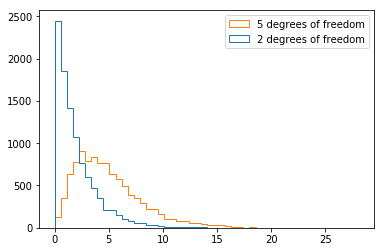

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')
#df2 is skewed much further to left
#and df5 is not as highly skewed

# Hypothesis Testing

In [10]:
df = pd.read_csv('grades.csv')

In [11]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [12]:
len(df)

2315

In [20]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']


In [21]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [22]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [23]:
from scipy import stats
stats.ttest_ind?

In [24]:
#Ttest will compare 2 independent samples to see if they have different mean
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])
'''
 for example larger than 0.05 or 0.1,
then we cannot reject the null hypothesis of identical average scores.
If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%,
then we reject the null hypothesis of equal averages.'''

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [25]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [26]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

In [ ]:
'''
It's important to stop here and talk about serious process from with how we're handling this investigation of the difference between these two populations. When we set the alpha to be 0.05, we're saying that we expect it that there will be positive result, 5% of the time just to the chance. 
 
As we run more and more T tests, we're more likely to find a positive result just because of the number of T tests we have run. 

When a data scientist run many tests in this way, it's called p-hacking or dredging and it's a serious methodological issue. P-hacking results in spurious correlations instead of generalizable results. There are a couple of different ways you can deal with p-hacking. The first is called the Bonferroni correction. In this case, you simply tighten your alpha value, the threshold of significance based on the number of tests you're running. So if you choose 0.05 with 1 test, you want to run 3 test, you reduce alpha by multiplying 0.05 by one-third to get a new value of 0.01 sub. I personally find this approach to be very conservative. 

Another option is to hold out some of your data for testing to see how generizable your result is. In this case, we might take half of our data for each of the two data frames, run our T test with that. Form specific hypothesis based on the result of these tests, then run very limited tests on the rest of the data. 

This method is actually heavily used in machine learning when building predictive models where it's called cross fold validation and you'll learn more about this in third course in this specialization. 

A final method which has come about is the pre-registration of your experiment. In this step, you would outline what you expect to find and why, and describe the test that would backup a positive proof of this. You register it with a third party, in academic circles, this is often a journal who determines whether it's a reasonable test or rather not. There's much more to learn about hypothesis testing. For instance, there are different tests used, depending on the shape of your data and different ways to report results instead of just p-values such as confidence intervals. But I hope this gives you a start to comparing the means of two different populations, which is a common task for data scientists and we'll followup some of this work in the second course in this series. 




'''